C:\Users\Admin\AppData\Local\Temp\ipykernel_20012\3096253926.py:410: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


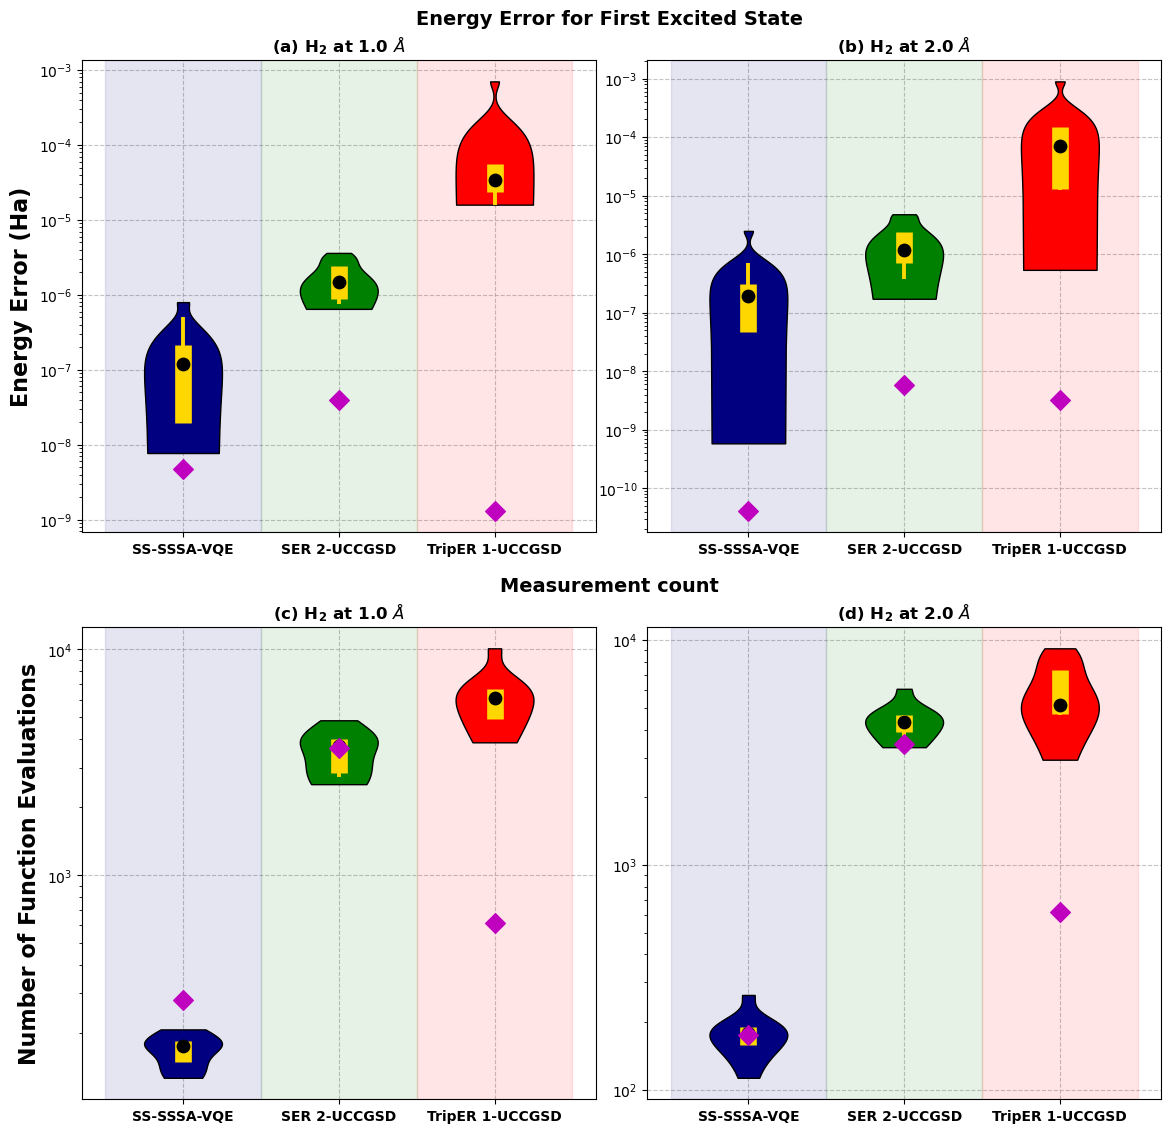

In [2]:
import matplotlib.pyplot as plt
import numpy as np

cm = 1/2.54

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30*cm, 30*cm), sharey=False,constrained_layout=True)

#plt.suptitle('Energy Error of First Excited State',fontweight='bold')

fig.text(0.52, 0.97, 'Energy Error for First Excited State', ha='center', fontsize=14, fontweight='bold')
fig.text(0.52, 0.49, 'Measurement count', ha='center', fontsize=14, fontweight='bold')

## H2 at 1.0 ##########################

fci =  -0.866600086589

ss_vqe = [-0.8665998723323028,-0.866599879911567,-0.866600071399427,-0.8666000531531716,-0.8666000548368732,-0.866600073303469,-0.8666000788173028,-0.8665998776948379,-0.8665996706029967,-0.8665992858024175,]

single = [-0.8665985087676534,-0.866599141479857,-0.8665994358371817,-0.8665992269360933,-0.8665984553703193,-0.8665973734551217,-0.8665972174400512,-0.8665964580681965,-0.8665987119927511,-0.8665993221786107]

triplet = [-0.8665661870397109,-0.8665804591577492,-0.866565052199827,-0.8665742662863435,-0.8665122991286679,-0.8665553480054032,-0.8665769494354566,-0.8665415567116045,-0.8658959582360845,-0.8665840999708071]

axs[0,0].set_axisbelow(True) # This moves the grid behind the data
axs[0,1].set_axisbelow(True) # This moves the grid behind the data

axs[0,0].grid(alpha =0.75,linestyle='--')
axs[0,1].grid(alpha =0.75,linestyle='--')


axs[0,0].axvspan(0.5, 1.5, alpha=0.1, color='navy')  # A
axs[0,0].axvspan(1.5, 2.5, alpha=0.1, color='g')  # B
axs[0,0].axvspan(2.5, 3.5, alpha=0.1, color='red')  # C


diff_ss = list()

diff_single = list()

diff_trip = list()

for i in range(10):
    diff_ss.append(abs(ss_vqe[i]-fci))
    diff_single.append(abs(single[i]-fci))
    diff_trip.append(abs(triplet[i]-fci))


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    axs[0,0].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    #ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sample name')

axs[0,0].set_ylabel('Energy Error (Ha)',fontweight='bold',fontsize=16)

data = list()
data.append(diff_ss)
data.append(diff_single)
data.append(diff_trip)



axs[0,0].set_title("(a) $\mathregular{H_{2}}$ at 1.0 $\AA$",fontweight='bold')
parts = axs[0,0].violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

colors = ['navy','green','red']

for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
#print(whiskers)
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
axs[0,0].scatter(inds, medians, marker='o',color='black', s=80, zorder=4)
axs[0,0].vlines(inds, quartile1, quartile3, color='gold', linestyle='-', lw=12)
axs[0,0].vlines(inds, whiskers_min, whiskers_max, color='gold', linestyle='-', lw=2.8)


## zero_value

zero_value = [-0.8666000818618632-fci,-0.8666000464962996-fci,-0.8666000852733916-fci]

x_positions = [1, 2, 3]

axs[0,0].scatter(x_positions, zero_value, 
            color='m', marker='D', s=100, zorder=6)

# set style for the axes
labels = ['SS-SSSA-VQE', 'SER 2-UCCGSD', 'TripER 1-UCCGSD']

set_axis_style(axs[0,0], labels)


for tick_label in axs[0,0].get_xticklabels():
    tick_label.set_fontweight('bold')



####### H2 at 2.0

axs[0,1].axvspan(0.5, 1.5, alpha=0.1, color='navy')  # A
axs[0,1].axvspan(1.5, 2.5, alpha=0.1, color='g')  # B
axs[0,1].axvspan(2.5, 3.5, alpha=0.1, color='red')  # C


fci = -0.986329933611 

ss_vqe = [-0.9863296743371417,-0.9863298352986325,-0.9863297218728078,-0.9863299046420149,-0.9863296040874765,-0.9863299320635228,-0.9863295108550914,-0.9863299330238255,-0.9863297568592844,-0.9863274344758561]

single = [-0.986329558992904,-0.9863288248780686,-0.9863290561668792,-0.9863292925892433,-0.9863274591438829,-0.9863251261900232,-0.986329760454818,-0.9863277547497384,-0.9863258422761358,
-0.986328708368861,]

triplet = [-0.9863175690175952,-0.9863293936900055,-0.9863315115628228,-0.9862527937662364,-0.9860812484883898,-0.9862434043582744,-0.9863158749098684,-0.9854355889683262,
-0.9861610486859709,-0.9862683382475659]


diff_ss = list()

diff_single = list()

diff_trip = list()

for i in range(10):
    diff_ss.append(abs(ss_vqe[i]-fci))
    diff_single.append(abs(single[i]-fci))
    diff_trip.append(abs(triplet[i]-fci))

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    axs[0,1].set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    #ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sample name')



data = list()
data.append(diff_ss)
data.append(diff_single)
data.append(diff_trip)




axs[0,1].set_title("(b) $\mathregular{H_{2}}$ at 2.0 $\AA$",fontweight='bold')
parts = axs[0,1].violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

colors = ['navy','green','red']

for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
#print(whiskers)
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
axs[0,1].scatter(inds, medians, marker='o', color='black', s=80, zorder=4)
axs[0,1].vlines(inds, quartile1, quartile3, color='gold', linestyle='-', lw=12)
axs[0,1].vlines(inds, whiskers_min, whiskers_max, color='gold', linestyle='-', lw=2.8)


zero_value = [-0.9863299335697604-fci,-0.9863299276696467-fci,-0.9863299303984174-fci]

x_positions = [1, 2, 3]

axs[0,1].scatter(x_positions, zero_value, 
            color='m', marker='D', s=100, zorder=6)


# set style for the axes
labels = ['SS-SSSA-VQE', 'SER 2-UCCGSD', 'TripER 1-UCCGSD']

set_axis_style(axs[0,1], labels)

for tick_label in axs[0,1].get_xticklabels():
    tick_label.set_fontweight('bold')

axs[0,0].set_yscale('log')
axs[0,1].set_yscale('log')

################################################ Function Plot #######################################


#plt.suptitle('Measurement count',fontweight='bold')

## H2 at 1.0 ##########################

fci =  -0.866600086589

ss_vqe = [178,174,188,204,142,171,208,135,127,176]
single = [2731,3137,2532,3639,4449,3944,2632,4856,4044,3842]


triplet = [6325,5409,6993,5818,6739,10112,4745,4288,3879,6635]

axs[1,0].set_axisbelow(True) # This moves the grid behind the data
axs[1,1].set_axisbelow(True) # This moves the grid behind the data

axs[1,0].grid(alpha =0.75,linestyle='--')
axs[1,1].grid(alpha =0.75,linestyle='--')


axs[1,0].axvspan(0.5, 1.5, alpha=0.1, color='navy')  # A
axs[1,0].axvspan(1.5, 2.5, alpha=0.1, color='g')  # B
axs[1,0].axvspan(2.5, 3.5, alpha=0.1, color='red')  # C



def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    #ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sample name')

axs[1,0].set_ylabel('Number of Function Evaluations',fontweight='bold',fontsize=16)

data = list()
data.append(ss_vqe)
data.append(single)
data.append(triplet)



# create test data
#np.random.seed(19680801)
#data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]



#ax1.set_title('Default violin plot')
#ax1.set_ylabel('Observed values')
#ax1.violinplot(data)

axs[1,0].set_title("(c) $\mathregular{H_{2}}$ at 1.0 $\AA$",fontweight='bold')
parts = axs[1,0].violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

colors = ['navy','green','red']

for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
#print(whiskers)
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

zero_value = [280,3654,614]

x_positions = [1, 2, 3]

axs[1,0].scatter(x_positions, zero_value, 
            color='m', marker='D', s=100, zorder=6)

inds = np.arange(1, len(medians) + 1)
axs[1,0].scatter(inds, medians, marker='o',color='black', s=80, zorder=4)
axs[1,0].vlines(inds, quartile1, quartile3, color='gold', linestyle='-', lw=12)
axs[1,0].vlines(inds, whiskers_min, whiskers_max, color='gold', linestyle='-', lw=2.8)



# set style for the axes
labels = ['SS-SSSA-VQE', 'SER 2-UCCGSD', 'TripER 1-UCCGSD']

set_axis_style(axs[1,0], labels)

for tick_label in axs[1,0].get_xticklabels():
    tick_label.set_fontweight('bold')




####### H2 at 2.0

axs[1,1].axvspan(0.5, 1.5, alpha=0.1, color='navy')  # A
axs[1,1].axvspan(1.5, 2.5, alpha=0.1, color='g')  # B
axs[1,1].axvspan(2.5, 3.5, alpha=0.1, color='red')  # C

fci = -0.986329933611 

ss_vqe = [193,264,150,188,113,191,157,189,169,160]

single = [3338,3437,4145,3844,6070,4957,4651,4147,4449,4653,]

triplet = [4642,2936,7610,4592,6483,8166,9187,4798,4850,5459]

diff_ss = list()

diff_single = list()

diff_trip = list()

for i in range(10):
    diff_ss.append(abs(ss_vqe[i]-fci))
    diff_single.append(abs(single[i]-fci))
    diff_trip.append(abs(triplet[i]-fci))

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    #ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sample name')



data = list()
data.append(ss_vqe)
data.append(single)
data.append(triplet)



axs[1,1].set_title("(d) $\mathregular{H_{2}}$ at 2.0 $\AA$",fontweight='bold')
parts = axs[1,1].violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

colors = ['navy','green','red']

for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
#print(whiskers)
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]


zero_value = [176,3446,615]

x_positions = [1, 2, 3]

axs[1,1].scatter(x_positions, zero_value, 
            color='m', marker='D', s=100, zorder=6)

inds = np.arange(1, len(medians) + 1)
axs[1,1].scatter(inds, medians, marker='o', color='black', s=80, zorder=3)
axs[1,1].vlines(inds, quartile1, quartile3, color='gold', linestyle='-', lw=12)
axs[1,1].vlines(inds, whiskers_min, whiskers_max, color='gold', linestyle='-', lw=2.8)





# set style for the axes
labels = ['SS-SSSA-VQE', 'SER 2-UCCGSD', 'TripER 1-UCCGSD']

set_axis_style(axs[1,1], labels)
for tick_label in axs[1,1].get_xticklabels():
    tick_label.set_fontweight('bold')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')

fig.tight_layout()
plt.subplots_adjust(top=0.94,bottom=0.06, wspace=0.1,hspace=0.2)
#plt.savefig('all_vio.png',dpi=600)
plt.show()